0.010040305658397296
FSR в ГГЦ: 99.74743974743976


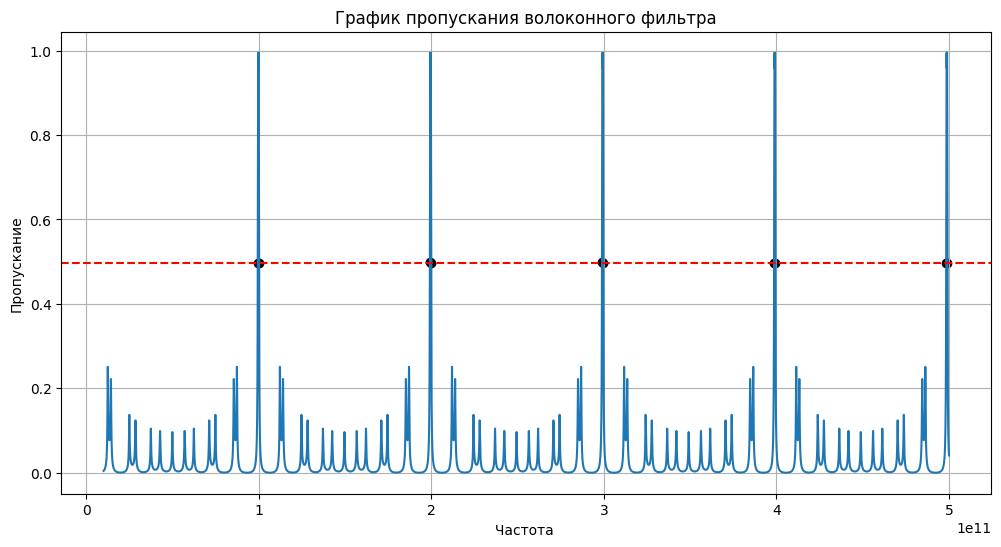

In [10]:
import math
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks
#%matplotlib qt 
freq = np.linspace(1e10, 5*10e10, 1000000)

k1 = k3 = 0.141
k2 = k1**2/(2-k1**2)
print(k2)
l = 14.42e-3
L = 16.48e-3
n = 1.46
c = 3e8
T1 = n*l/c
T2 = n*L/c
α = 0.00018
γ1 = np.exp(-α * l)
γ2 = np.exp(-α * L)
N = 7
M = 8
C1 = np.sqrt(1-k1)
C2 = np.sqrt(1-k2)
C3 = np.sqrt(1-k3)
'''Здесь потери на резонансном пике кольцевого резонатора определяются как резонансные потери. \
Значение κ1 должно быть меньше 0,38 для реализации низкого перекрестного искажения менее\
−15  дБ, а κ2 можно рассчитать из соотношения k2 = k1**2/(2-k1**2), в котором κ2 является критическим коэффициентом связи, который \
минимизирует резонансные потери [15] . Частотная характеристика DRR с κ 1  = κ 3 = 0,25, κ 2 = 0,032, при сохранении других \
параметров неизменными, представлена ​​на рис. 6б , на котором вторичные пики значительно подавлены, сохраняя резонансные потери \
на аналогичном уровне по сравнению с рис. 6а . '''
def t_filter_first(w):
    z = np.exp(1j*w*2*np.pi*(T1 / N))
    return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
        + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
def T_filter_first(freq):
    result = []
    for w in freq:
        value = t_filter_first(w)
        result.append(value)
    return np.array(result)

T_values = np.abs(T_filter_first(freq))
T_values = T_values - np.min(T_values)
max_amplitude = np.max(T_values)
half_max_amplitude = max_amplitude / 2
# Поиск точек пересечения с половиной максимума
crossings = []
for i in range(len(T_values)):
    if (T_values[i] - half_max_amplitude) * (T_values[i-1] - half_max_amplitude) <= 0:
        crossings.append((freq[i], T_values[i]))
    #if i == len(T_values)-1:
        #fwhm = abs(crossings[7][0] - crossings[6][0])
        #print(f"FWHM в МГЦ: {fwhm/1e6}")
    #else:
        #print("Не найдено двух пересечений с половиной максимума.")
#print(max(crossings))   
# Поиск пиков
peaks, _ = find_peaks(T_values)
#print(freq[peaks])
#print(T_values[peaks])
# Определение максимального пика
print('FSR в ГГЦ:', (abs(crossings[1][0]-crossings[3][0]))/1e9)
#print('FWHM в МГЦ:', 39.500039499644515)
# Построим график зависимости модуля пропускания от частоты
plt.figure(figsize=(12, 6))
plt.plot(freq, T_values)
plt.axhline(half_max_amplitude, color='r', linestyle='--')  # линия половины максимума
plt.scatter([c[0] for c in crossings], [c[1] for c in crossings], color='k')  # точки пересечения
#plt.xlim(1.96e10, 1.98e10)
plt.xlabel('Частота ')
plt.ylabel('Пропускание')
plt.title('График пропускания волоконного фильтра')
plt.grid(True)
plt.show()

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd
from scipy.signal import find_peaks

df = pd.read_csv('50mks1mSA0.csv')
spectr1 = np.array(df.iloc[:,0])
spectr1 = np.linspace(1.4100E-04, 6.4100E-04, 625000)
Spectr1 = np.array(df.iloc[:,1])
dt = spectr1[1] - spectr1[0]
fft_signal = np.fft.fft(Spectr1)
fft_signal = fft_signal[:len(fft_signal)//2-1]
freq = np.fft.fftfreq(len(Spectr1), d = dt)
freq = freq[freq>0]
fft_signal_norm = abs(fft_signal)/max(abs(fft_signal))\

c= 3e8
h = 1550e-9
f_Er = c/h
freq = freq - 80e6 + c/h

def a(FSR):
    #FSR = 800e6
    n = 1.46
    l = 7 * c / (n  * FSR)
    N = 7
    M = 8
    L = M/N * l
    k1 = k3 = 0.25
    k2 = 0.032
    T1 = n*l/c
    T2 = n*L/c
    α = 0.000001
    γ1 = np.exp(-α * l)
    γ2 = np.exp(-α * L)
    C1 = np.sqrt(1-k1)
    C2 = np.sqrt(1-k2)
    C3 = np.sqrt(1-k3)
    def t_filter_first(w):
        z = np.exp(1j*w*2*np.pi*T1/N)
        return  (1j * np.sqrt(γ1 * γ2 * k1 * k2 * k3) * np.sqrt(z**(-(N + M))))/(1 - C1 * C2 * γ1 * z**(-N) - C2 * C3 * γ2 * z**(-M)\
            + C1 * C3 * γ1 * γ2 * z**(-(N + M)))
    def T_filter_first(freq):
        result = []
        for w in freq:
            value = t_filter_first(w)
            result.append(value)
        return np.array(result)
    T_values = np.abs(T_filter_first(freq))
    peaks, _ = find_peaks(T_values)
    max_peak_index = peaks[np.argmax(T_values[peaks])]
# Значение по оси x для максимального пика
    max_x_value = freq[max_peak_index]
    return max_x_value
def b(freq):
    FSR = 1000e6
    while abs((a(FSR)  - (c/h -0.35e6))) > 1e6:
        FSR-=1e6
    return FSR
print(b(freq)/1e6)


718.0
